In [139]:
#importing libraries and file
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

Saving netflix_titles.csv to netflix_titles (2).csv


In [140]:
#creating dataframe
netflix = pd.read_csv('netflix_titles.csv')

# Data Description

In [141]:
#head() functions shows the first 5 rows and columns 
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [142]:
#columns lists out all the column names in the dataset
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [143]:
#shape shows the amount of columns & row inside of dataset
netflix.shape

(8807, 12)

In [144]:
#info shows the datasets index datatype, columns and non-null values count
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [145]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [146]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Cleaning


In [147]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [148]:
netflix.drop(columns=['director','cast'], inplace= True)

In [149]:
netflix.duplicated().sum()

0

In [150]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [151]:
netflix[netflix.rating.isin(['74 min', '66 min', '84 min', 'nan'])]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [152]:
netflix = netflix.replace({'rating':{'74 min':'TV-MA','66 min':'TV-MA', '84 min':'TV-MA'}})

In [153]:
netflix.iloc[[5541,5813,5794]]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,TV-MA,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,TV-MA,NaN,Movies,The comic puts his trademark hilarious/thought...
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,TV-MA,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [154]:
netflix.iloc[5813, netflix.columns.get_loc('duration')] = '66 min'

In [155]:
netflix.iloc[5541, netflix.columns.get_loc('duration')] = '74 min'

In [156]:
netflix.iloc[5794, netflix.columns.get_loc('duration')] = '84 min'

In [157]:
netflix.iloc[[5541,5813,5794]]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [158]:
netflix['month_name']=netflix['date_added'].dt.month_name()

In [159]:
netflix['month'] = netflix['date_added'].dt.strftime('%m')
netflix['Year'] = netflix['date_added'].dt.strftime('%Y')

In [160]:
netflix[['release_year','title']]

,release_year,title
0,2020,Dick Johnson Is Dead
1,2021,Blood & Water
2,2021,Ganglands
3,2021,Jailbirds New Orleans
4,2021,Kota Factory
...,...,...
8802,2007,Zodiac
8803,2018,Zombie Dumb
8804,2009,Zombieland
8805,2006,Zoom


In [161]:
netflix.groupby(["release_year"])['title'].count()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: title, Length: 74, dtype: int64

In [162]:
netflix_tv = netflix[netflix['type']=='TV Show']
netflix_movie = netflix[netflix['type']=='Movie']
netflix_tv

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_name,month,Year
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,09,2021
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,09,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,09,2021
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,09,2021
5,s6,TV Show,Midnight Mass,NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,09,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,"Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,May,05,2018
8796,s8797,TV Show,Yunus Emre,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",January,01,2017
8797,s8798,TV Show,Zak Storm,"United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,September,09,2018
8800,s8801,TV Show,Zindagi Gulzar Hai,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",December,12,2016


In [163]:
netflix_movie

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_name,month,Year
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,09,2021
6,s7,Movie,My Little Pony: A New Generation,NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,09,2021
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,09,2021
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,September,09,2021
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,September,09,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,March,03,2016
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,11,2019
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,11,2019
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,01,2020


In [164]:
netflix.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [165]:
netflix[['rating','title']]

,rating,title
0,PG-13,Dick Johnson Is Dead
1,TV-MA,Blood & Water
2,TV-MA,Ganglands
3,TV-MA,Jailbirds New Orleans
4,TV-MA,Kota Factory
...,...,...
8802,R,Zodiac
8803,TV-Y7,Zombie Dumb
8804,R,Zombieland
8805,PG,Zoom


In [166]:
netflix.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [167]:
netflix.groupby('type')['release_year'].value_counts()

type     release_year
Movie    2017            767
         2018            767
         2016            658
         2019            633
         2020            517
                        ... 
TV Show  1979              1
         1981              1
         1985              1
         1989              1
         1991              1
Name: release_year, Length: 119, dtype: int64

In [168]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

# Questions to be answered


---





# **question #1: Over the years, which type of media has netflix added to it's library more Movies or TV shows ?**

---



In [169]:
netflix.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [170]:
testing = netflix.type.value_counts()
testing

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [171]:
explode = (0.05, 0.05)

<AxesSubplot:title={'center':'Netflix Content'}, ylabel='type'>

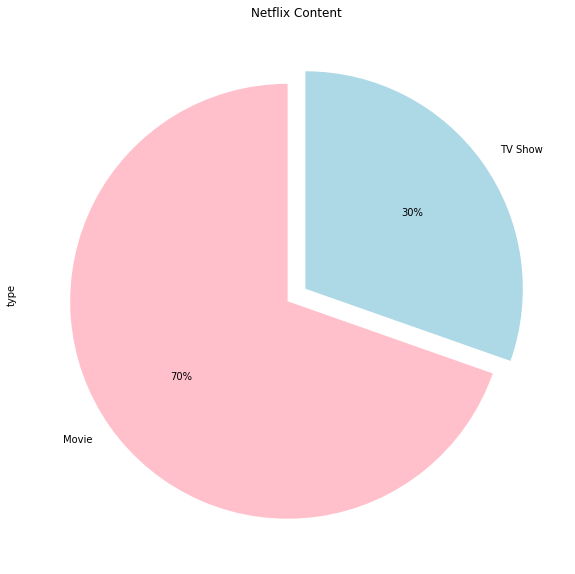

In [172]:
testing.plot(kind='pie',title='Netflix Content',figsize=(20,10),autopct='%1.0f%%',colors=['pink','lightblue'],startangle=90,explode=explode)

In [173]:
netflix.groupby('type')['release_year'].value_counts()

type     release_year
Movie    2017            767
         2018            767
         2016            658
         2019            633
         2020            517
                        ... 
TV Show  1979              1
         1981              1
         1985              1
         1989              1
         1991              1
Name: release_year, Length: 119, dtype: int64

In [174]:
netflix_movie[['release_year','type']].value_counts()

release_year  type 
2018          Movie    767
2017          Movie    767
2016          Movie    658
2019          Movie    633
2020          Movie    517
                      ... 
1961          Movie      1
1963          Movie      1
1966          Movie      1
1947          Movie      1
1946          Movie      1
Length: 73, dtype: int64

# **Question #2:Who is Netflix's core audience? Who is Netflix providing the most content for?**
---





In [175]:
netflix.rating.value_counts()

TV-MA       3210
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [176]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

In [177]:
netflix[netflix.rating.isin(['G', 'TV-G'])]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_name,month,Year,year_added,month_added
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,September,09,2021,2021.0,9.0
75,s76,Movie,You vs. Wild: Out Cold,NaN,2021-09-14,2021,TV-G,106 min,Children & Family Movies,"After a plane crash leaves Bear with amnesia, ...",September,09,2021,2021.0,9.0
106,s107,TV Show,Bunk'd,United States,2021-09-05,2021,TV-G,5 Seasons,"Kids' TV, TV Comedies","The Ross siblings of Disney's hit series ""Jess...",September,09,2021,2021.0,9.0
107,s108,Movie,A Champion Heart,United States,2021-09-04,2018,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,September,09,2021,2021.0,9.0
108,s109,TV Show,Dive Club,Australia,2021-09-03,2021,TV-G,1 Season,"Kids' TV, TV Dramas, Teen TV Shows","On the shores of Cape Mercy, a skillful group ...",September,09,2021,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,s8670,TV Show,V.R. Troopers,United States,2016-01-01,1995,TV-G,2 Seasons,Kids' TV,Three friends who study martial arts find them...,January,01,2016,2016.0,1.0
8702,s8703,Movie,Waterschool,"United States, Brazil, India, Uganda, China",2018-07-25,2018,TV-G,68 min,Documentaries,"Six young women, who each live near one of Ear...",July,07,2018,2018.0,7.0
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,"United States, East Germany, West Germany",2020-01-01,1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...,January,01,2020,2020.0,1.0
8747,s8748,TV Show,Winsanity,United States,2018-12-15,2016,TV-G,1 Season,Reality TV,Actor Donald Faison hosts this game show in wh...,December,12,2018,2018.0,12.0


In [178]:
netflix_tv[['rating','type']].value_counts()

rating    type   
TV-MA     TV Show    1145
TV-14     TV Show     733
TV-PG     TV Show     323
TV-Y7     TV Show     195
TV-Y      TV Show     176
TV-G      TV Show      94
NR        TV Show       5
R         TV Show       2
TV-Y7-FV  TV Show       1
dtype: int64

In [179]:
netflix_movie[['rating','type']].value_counts()

rating    type 
TV-MA     Movie    2065
TV-14     Movie    1427
R         Movie     797
TV-PG     Movie     540
PG-13     Movie     490
PG        Movie     287
TV-Y7     Movie     139
TV-Y      Movie     131
TV-G      Movie     126
NR        Movie      75
G         Movie      41
TV-Y7-FV  Movie       5
NC-17     Movie       3
UR        Movie       3
dtype: int64

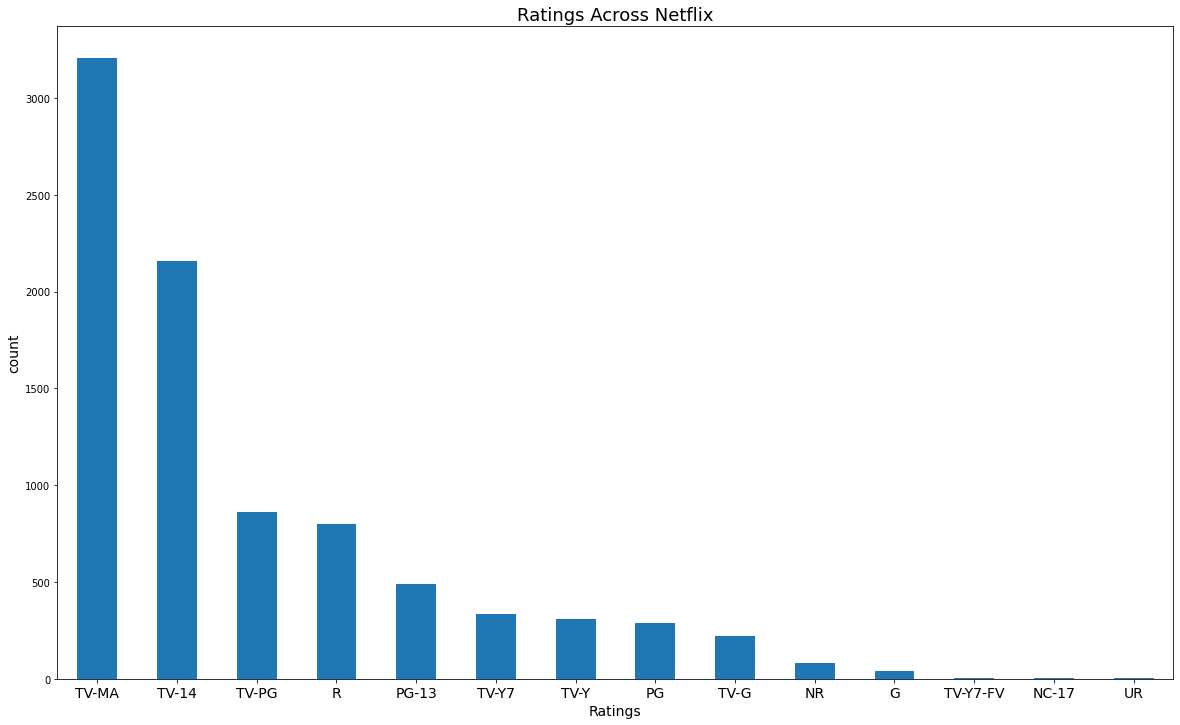

In [180]:
plt.figure(figsize=(20,12))
netflix.rating.value_counts().plot(kind ='bar')
plt.title('Ratings Across Netflix',fontsize=18)
plt.xlabel('Ratings',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.xticks(rotation=360,fontsize=14)
plt.show()

# **Question #3: Which genre does Netflix produce the most of?**


---



In [181]:
netflix.listed_in.count()

8807

In [182]:
netflix.listed_in.unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [183]:
netflix['listed_in'].str.get_dummies(sep=',').sum()

 Anime Features               50
 Children & Family Movies     36
 Classic & Cult TV             6
 Classic Movies               36
 Comedies                    464
                            ... 
TV Dramas                     67
TV Horror                     11
TV Sci-Fi & Fantasy            1
TV Shows                      16
Thrillers                     65
Length: 73, dtype: int64

In [184]:
netflix_tv.listed_in.count()

2676

In [185]:
netflix_genre_tv = netflix_tv['listed_in'].str.replace(' ', '').str.get_dummies(sep=',').sum()
netflix_genre_tv.sort_values(ascending=False, inplace=True)
netflix_genre_tv

InternationalTVShows        1351
TVDramas                     763
TVComedies                   581
CrimeTVShows                 470
Kids'TV                      451
Docuseries                   395
RomanticTVShows              370
RealityTV                    255
BritishTVShows               253
AnimeSeries                  176
Spanish-LanguageTVShows      174
TVAction&Adventure           168
KoreanTVShows                151
TVMysteries                   98
Science&NatureTV              92
TVSci-Fi&Fantasy              84
TVHorror                      75
TeenTVShows                   69
TVThrillers                   57
Stand-UpComedy&TalkShows      56
Classic&CultTV                28
TVShows                       16
dtype: int64

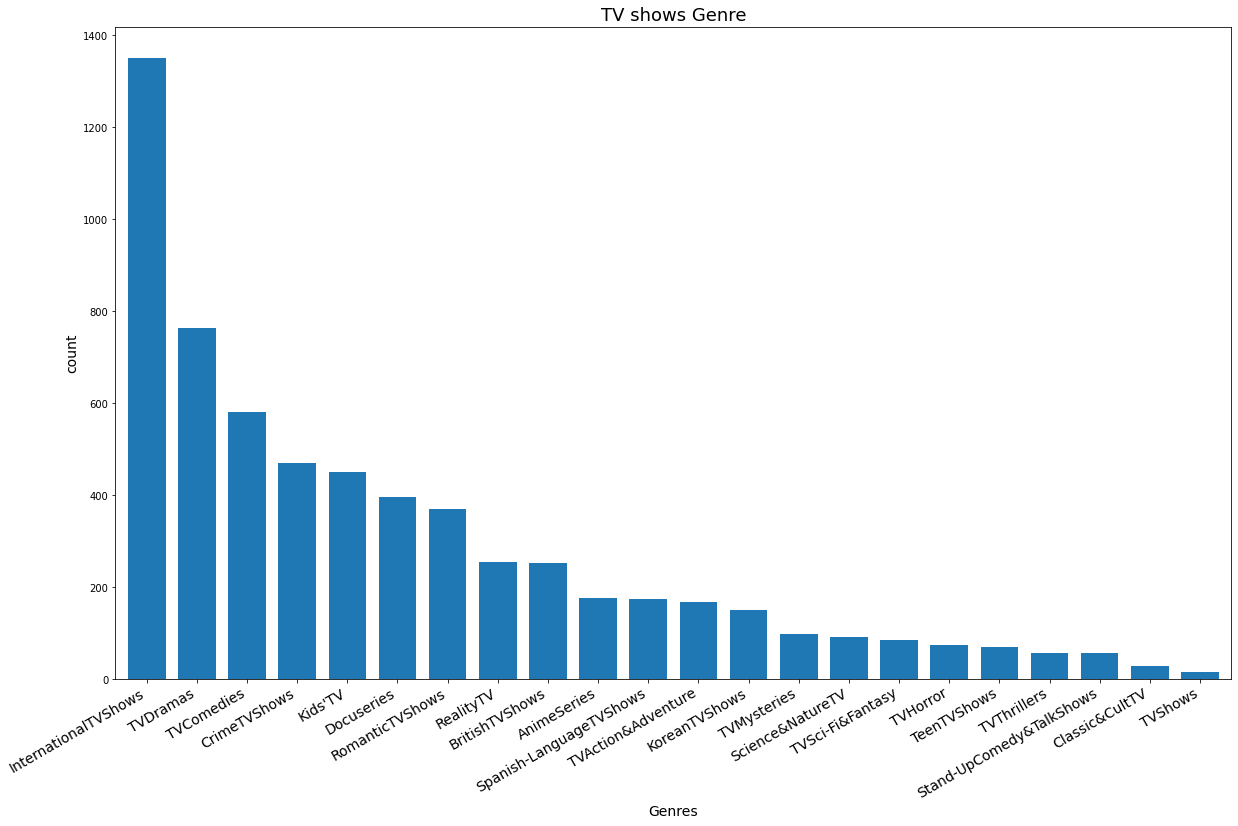

In [186]:
plt.figure(figsize=(20,12))
netflix_genre_tv.plot(kind ='bar',width= 0.75)
plt.title('TV shows Genre',fontsize=18)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.xticks(rotation=30, ha='right',fontsize=14)
plt.show()

In [187]:
netflix_genre_movie = netflix_movie['listed_in'].str.replace(' ', '').str.get_dummies(sep=',').sum()
netflix_genre_movie.sort_values(ascending=False, inplace=True)
netflix_genre_movie

InternationalMovies      2752
Dramas                   2427
Comedies                 1674
Documentaries             869
Action&Adventure          859
IndependentMovies         756
Children&FamilyMovies     641
RomanticMovies            616
Thrillers                 577
Music&Musicals            375
HorrorMovies              357
Stand-UpComedy            343
Sci-Fi&Fantasy            243
SportsMovies              219
ClassicMovies             116
LGBTQMovies               102
CultMovies                 71
AnimeFeatures              71
Faith&Spirituality         65
Movies                     57
dtype: int64

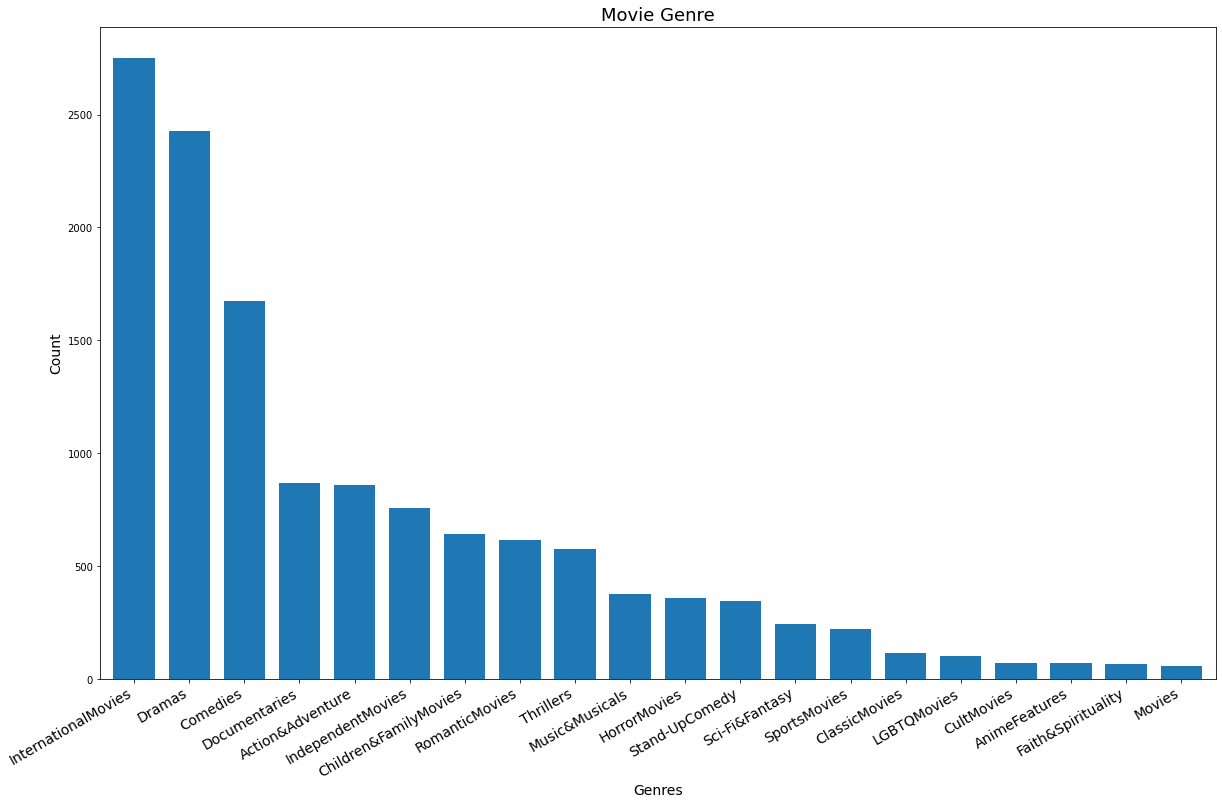

In [188]:
plt.figure(figsize=(20,12))
netflix_genre_movie.plot(kind ='bar',width= 0.75)
plt.title('Movie Genre',fontsize=18)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=30, ha='right',fontsize=14)
plt.show()

# **question #4: Which months does Netflix add the most content?**
---



In [189]:
content_month = netflix.month.value_counts().sort_index()
content_month

01    738
02    563
03    742
04    764
05    632
06    728
07    827
08    755
09    770
10    760
11    705
12    813
Name: month, dtype: int64

In [190]:
netflix[['month_name','month']].value_counts()

month_name  month
July        07       827
December    12       813
September   09       770
April       04       764
October     10       760
August      08       755
March       03       742
January     01       738
June        06       728
November    11       705
May         05       632
February    02       563
dtype: int64

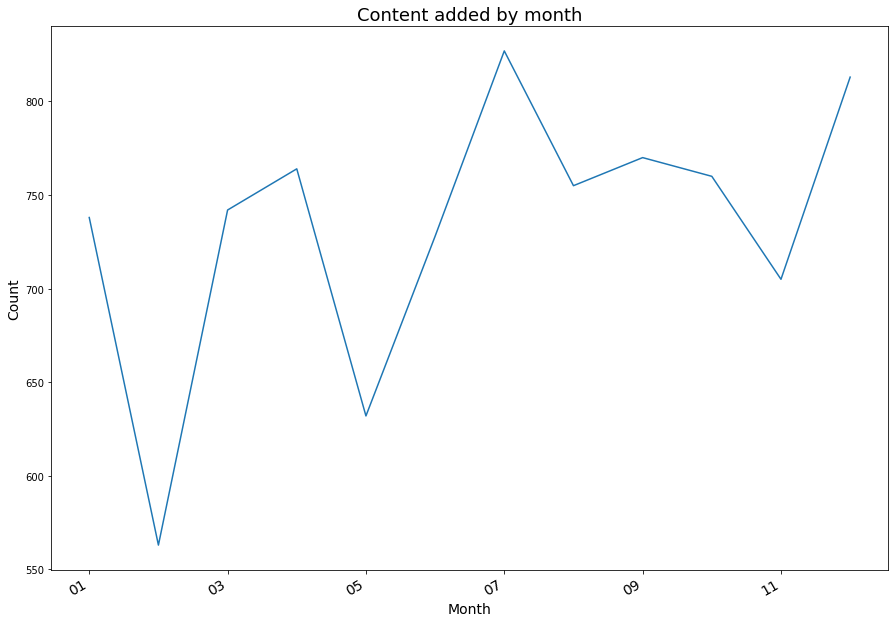

In [191]:
plt.figure(figsize=(15,10))
content_month.plot(kind='line')
plt.title('Content added by month',fontsize=18)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=30, ha='right',fontsize=14)
plt.show()

In [192]:
netflix.Year.value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: Year, dtype: int64

In [193]:
netflix[['Year','type']].value_counts().sort_index()

Year  type   
2008  Movie         1
      TV Show       1
2009  Movie         2
2010  Movie         1
2011  Movie        13
2012  Movie         3
2013  Movie         6
      TV Show       5
2014  Movie        19
      TV Show       5
2015  Movie        56
      TV Show      26
2016  Movie       253
      TV Show     176
2017  Movie       839
      TV Show     349
2018  Movie      1237
      TV Show     412
2019  Movie      1424
      TV Show     592
2020  Movie      1284
      TV Show     595
2021  Movie       993
      TV Show     505
dtype: int64

In [194]:
#save to csv
#netflix.to_csv('netflix_cleaned.csv',encoding='utf-8')

# **Top 10 Countries that produces Content**

---



In [195]:
netflix['country'].isna().sum()

831

In [196]:
netflix['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

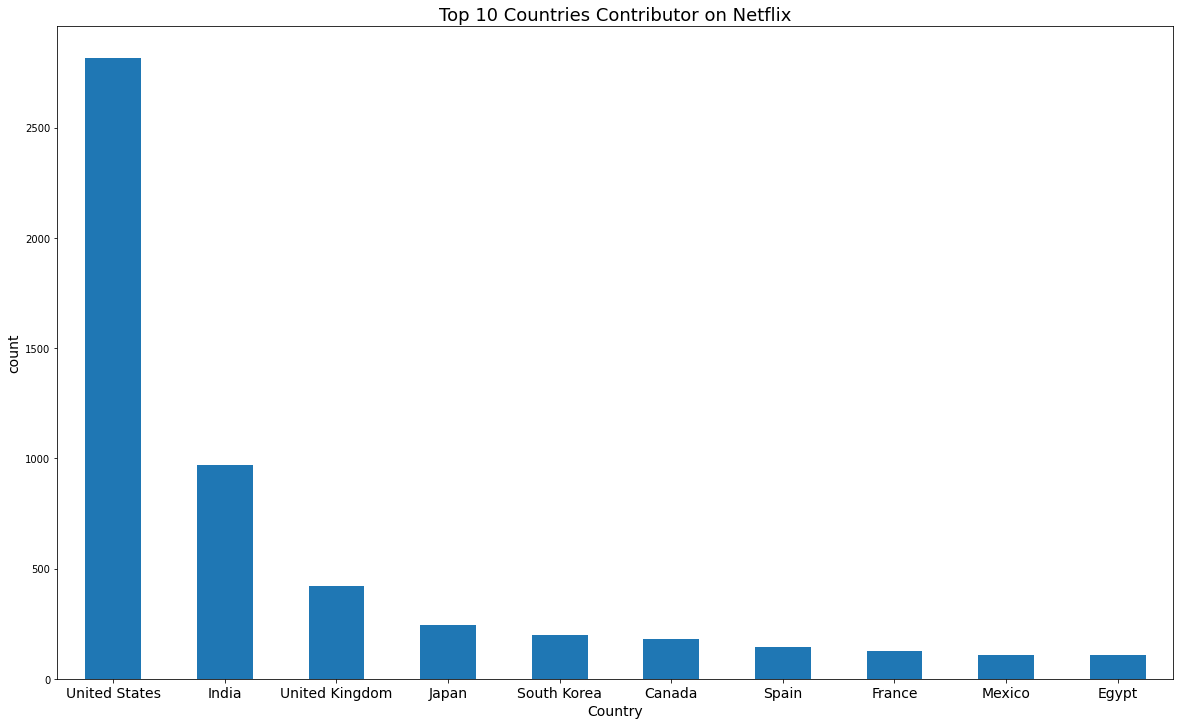

In [197]:
plt.figure(figsize=(20,12))
netflix.country.value_counts()[:10].plot(kind ='bar')
plt.title('Top 10 Countries Contributor on Netflix',fontsize=18)
plt.xlabel('Country',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.xticks(rotation=360,fontsize=14)
plt.show()

# **Saving File Methods**

---



In [198]:
from google.colab import files
netflix_tv.to_csv('netflix_tv.csv', index = False, encoding = 'utf-8-sig')
files.download('netflix_tv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
from google.colab import files
netflix_movie.to_csv('netflix_movie.csv', index = False, encoding = 'utf-8-sig')
files.download('netflix_movie.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [200]:
from google.colab import files
netflix.to_csv('netflix.csv', index = False, encoding = 'utf-8-sig')
files.download('netflix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>